In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import csv
from scipy.optimize import minimize
from matplotlib import cm

w_old = 1x3 weight vector

data = 7x3 matrix. 1st column is 1's, 2nd and 3rd columns are (x,y) coordinates

label = 7x1 column. 1 for Class 1(blue), -1 for Class 2(green).

gamma = learning rate (0<gamma<1)

EPOCH = # of cycles through the data points


w_fit -> returns calculated weight vector (w) that separates data with hyperplane, w^T x = 0 
The fixator. Will focus on one point until it fixes this point's labeling

w_fit2 -> also returns calculated weight vector
The try-er. Will try once to fix a point's labeling, and then moves on, but will circle back around until it gets it right. Plots for 6 weight vectors.

w_fit2a -> same as w_fit2, just capable of graphing as many adjusted weight vectors as needed.

w_fit3 -> same as w_fit2, just with no graphing capabilities and print statements are off.

In [3]:
def w_fit(w_old, data, label, gamma, EPOCH):
    N = np.shape(data)[0]
    M = np.zeros((N,1))
    for j in range(EPOCH):
        for i in range(N):
            M[i] = np.sign(w_old @ np.transpose(data[i,:]))
            if M[i] != label[i]:
                M[i] = 0  #incorrectly labeled
            else: 
                M[i] = 1  #correct
        #print(M)  
        if np.size(np.argwhere(M==0)):
            index = np.argwhere(M==0)[0][0]
            p = data[index,:]
            #print('Adjusting to ', p)
            #w_new = w_old + (label[index] * p) #same as setting gamma = 0.5
            w_new = w_old + gamma * (label[index] - np.sign(w_old @ np.transpose(p))) * p
            #print('w_new = ', w_new)
            w_old = w_new
        else:
            print('Data separated after', j, 'epochs')
            return w_new
    else: 
        return w_new

In [4]:
def w_fit2(w_old, data, label, gamma, EPOCH):
    N = np.shape(data)[0]
    M = np.zeros((N,1))
    c = 0 # counts number of times weight changes
    # start the graph
    fig = plt.figure(figsize=(4,4))
    x = np.linspace(-0.1,2.1,100)
    plt.xlim([-0.1, 2.1])
    plt.scatter(data[label==1,1],data[label==1,2],marker = "*",color = 'k')
    plt.scatter(data[label==-1,1],data[label==-1,2],marker = "x",color ='k')
    y = (-w_old[0] - w_old[1] * x)/w_old[2]
    plt.plot(x, y, '-r', label='w= [{0:.2f},{1:.2f},{2:.2f}]'.format(w_old[0],w_old[1],w_old[2]))
    colors = ['pink', 'navajowhite','khaki','lightgreen', 'lightblue','darkorchid']
    for j in range(EPOCH):
        k=0 # stops us once we reach separation of data
        for i in range(N):
            M[i] = np.sign(w_old @ np.transpose(data[i,:]))
            if M[i] != label[i]: # label is incorrect - adjust towards data[i,:]
                #print('Adjusting to', data[i,1:3])
                w_new = w_old + gamma * (label[i] - M[i]) * data[i,:]
                w_old = w_new
                #print("w_new =", w_old)
                # draw new line on graph
                y = (- w_new[0] - (w_new[1]*x))/w_new[2]
                plt.plot(x, y, color = colors[c], label='w= [{0:.2f},{1:.2f},{2:.2f}]'.format(w_new[0],w_new[1],w_new[2]))
                plt.ylim([-0.1, 2.1])
                plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
                plt.title('Learning Rate = {0:.2f}'.format(gamma))
                # update counters
                k=0
                c=c+1
            else: # label is correct - no need to adjust w
                k=k+1
                #print('w_new =', w_old)
        if k==N:
            print('Separation achieved! It took', j, 'cycles')
            return w_old, j
        if (k<N and j+1==EPOCH):
            print('EPOCH attained. See if seperation occurs.')
            return w_old
    plt.show()


In [5]:
def w_fit2a(w_old, data, label, gamma, EPOCH):
    N = np.shape(data)[0]
    M = np.zeros((N,1))
    c = 0 # counts number of times weight changes
    # start the graph
    fig = plt.figure(figsize=(4,4))
    x = np.linspace(-0.1,2.1,100)
    plt.xlim([-0.1, 2.1])
    plt.scatter(data[label==1,1],data[label==1,2],marker = "*",color = 'k')
    plt.scatter(data[label==-1,1],data[label==-1,2],marker = "x",color ='k')
    y = (-w_old[0] - w_old[1] * x)/w_old[2]
    plt.plot(x, y, '-r', label='w= [{0:.2f},{1:.2f},{2:.2f}]'.format(w_old[0],w_old[1],w_old[2]))
    cmap = plt.get_cmap('rainbow_r')
    colors = [cmap(i) for i in np.linspace(0.1, 1, N * EPOCH)]
    for j in range(EPOCH):
        k=0 # stops us once we reach separation of data
        for i in range(N):
            M[i] = np.sign(w_old @ np.transpose(data[i,:]))
            if M[i] != label[i]: # label is incorrect - adjust towards data[i,:]
                w_new = w_old + gamma * (label[i] - M[i]) * data[i,:]
                w_old = w_new
                # draw new line on graph
                y = (- w_new[0] - (w_new[1]*x))/w_new[2]
                plt.plot(x, y, color = colors[int(EPOCH/2*c)], label='w= [{0:.2f},{1:.2f},{2:.2f}]'.format(w_new[0],w_new[1],w_new[2]))
                plt.ylim([-0.1, 2.1])
                plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
                plt.title('Learning Rate = {0:.2f}'.format(gamma))
                # update counters
                k=0
                c=c+1
            else: # label is correct - no need to adjust w
                k=k+1
        if k==N:
            print('Separation achieved! It took', j, 'cycles')
            return w_old, j
        if (k<N and j+1==EPOCH):
            print('EPOCH attained. See if seperation occurs.')
            return w_old
    plt.show()

In [12]:
def w_fit3(w_old, data, label, gamma, EPOCH):
    N = np.shape(data)[0]
    M = np.zeros((N,1))
    c = 0 # counts number of times weight changes
    for j in range(EPOCH):
        k=0 # stops us once we reach separation of data
        for i in range(N):
            M[i] = np.sign(w_old @ np.transpose(data[i,:]))
            if M[i] != label[i]: # label is incorrect - adjust towards data[i,:]
                #print('Adjusting to', data[i,1:3])
                w_new = w_old + gamma * (label[i] - M[i]) * data[i,:]
                w_old = w_new
                #print("w_new =", w_old)
                # update counters
                k=0
                c=c+1
            else: # label is correct - no need to adjust w
                k=k+1
                #print('w_new =', w_old)
        if k==N:
            #print('Separation achieved! It took', j, 'cycles')
            return w_old
        if (k<N and j+1==EPOCH):
            #print('EPOCH attained. See if seperation occurs.')
            return w_old
    plt.show()


# Problem 1

Text(0.5, 1.0, 'Scatter-plot of the Data')

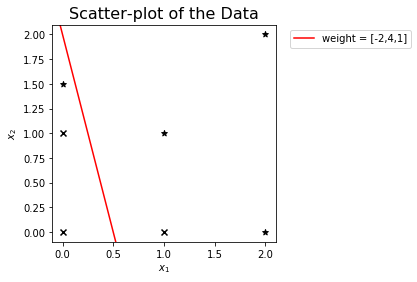

In [31]:
## A & B
## plot the data with original line
C = np.array([[0,1.5,1],[1,1,1],[2,2,1],[2,0,1],[0,0,-1],[1,0,-1],[0,1,-1]]) #one row of C is: x, y, label
label = C[:,2]

fig = plt.figure(figsize=(4,4))

plt.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
plt.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')

x = np.linspace(-0.1,2.1,100)
w = np.array([-2,4,1])
y = (-w[0] - w[1] * x)/w[2]
plt.plot(x, y, '-r', label='weight = [-2,4,1]')
axes = plt.gca()
axes.set_ylim([-0.1,2.1])
axes.set_xlim([-0.1,2.1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
axes.set_xlabel('$x_1$')
axes.set_ylabel('$x_2$')
plt.title('Scatter-plot of the Data', fontsize = 16)

Separation achieved! It took 5 cycles
Separation achieved! It took 2 cycles
Separation achieved! It took 4 cycles


(array([-2.8,  2.4,  2.2]), 4)

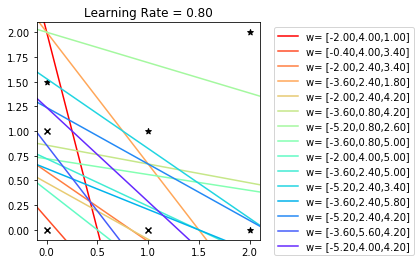

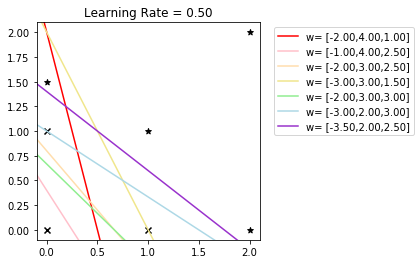

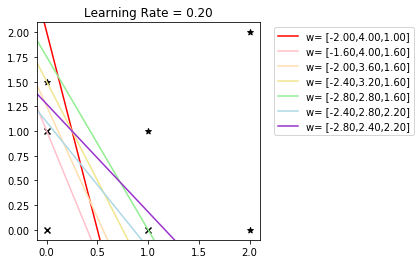

In [14]:
## C
## update the weights + plot shifting line
tilde_C = np.array([[1,0,1.5,1],[1,1,1,1],[1,2,2,1],[1,2,0,1],[1,0,0,-1],[1,1,0,-1],[1,0,1,-1]])
w0 = np.array([-2, 4, 1])
w_fit2a(w0, tilde_C[:,0:3], tilde_C[:,3], 0.8, 10)
w_fit2(w0, tilde_C[:,0:3], tilde_C[:,3], 0.5, 10)
w_fit2(w0, tilde_C[:,0:3], tilde_C[:,3], 0.2, 10)

Text(0.5, 0.98, 'Perceptron learning for $\\gamma = 0.5$')

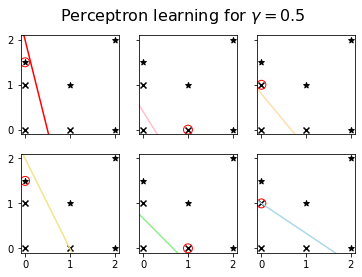

In [78]:
## C
## graph weight change one by one
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
(ax0, ax1, ax2), (ax3, ax4, ax5) = axs

x = np.linspace(-0.1,2.1,100)
ax0.set_xlim([-0.1, 2.1])
ax0.set_ylim([-0.1, 2.1])

label = tilde_C[:,3]
ax0.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
ax0.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')
ax1.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
ax1.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')
ax2.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
ax2.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')
ax3.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
ax3.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')
ax4.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
ax4.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')
ax5.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
ax5.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')

w0 = np.array([-2,4,1])
w1 = np.array([-1,4,2.5])
w2 = np.array([-2,3,2.5])
w3 = np.array([-3,3,1.5])
w4 = np.array([-2,3,3])
w5 = np.array([-3,2,3])
w6 = np.array([-3.5, 2, 2.5])

y0 = (-w0[0] - w0[1] * x)/w0[2]
y1 = (-w1[0] - w1[1] * x)/w1[2]
y2 = (-w2[0] - w2[1] * x)/w2[2]
y3 = (-w3[0] - w3[1] * x)/w3[2]
y4 = (-w4[0] - w4[1] * x)/w4[2]
y5 = (-w5[0] - w5[1] * x)/w5[2]
y6 = (-w6[0] - w6[1] * x)/w6[2]

ax0.plot(x, y0, 'r')
ax0.scatter(0, 1.5, s=80, facecolors='none', edgecolors='r')
ax1.plot(x, y1, 'pink')
ax1.scatter(1,0,  s=80, facecolors='none', edgecolors='r')
ax2.plot(x,y2, 'navajowhite')
ax2.scatter(0,1,  s=80, facecolors='none', edgecolors='r')
ax3.plot(x,y3, 'khaki')
ax3.scatter(0,1.5, s=80, facecolors='none', edgecolors='r')
ax4.plot(x,y4, 'lightgreen')
ax4.scatter(1, 0, s=80, facecolors='none', edgecolors='r')
ax5.plot(x,y5, 'lightblue')
ax5.scatter(0,1,  s=80, facecolors='none', edgecolors='r')

fig.suptitle('Perceptron learning for $\gamma = 0.5$', fontsize=16)
#ax6.plot(x,y6, 'darkorchid')

Optimization terminated successfully.
         Current function value: 0.455424
         Iterations: 101
         Function evaluations: 180


Text(0.5, 1.0, 'Nelder-Mead optimal weight')

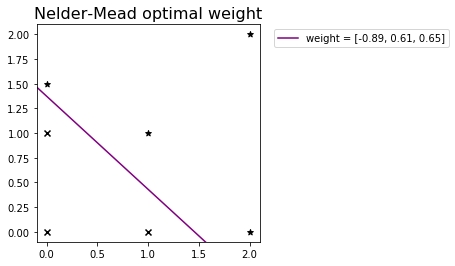

In [16]:
# Nelder-Mead
def least_squares(w):
    return (1/7)*np.sum(np.square(np.subtract(w @ tilde_C[:,0:3].T, tilde_C[:,3])))
#print(least_squares(w0))

best_w = minimize(least_squares, w0, method='nelder-mead',
               options={'disp': True})
#print(best_w.x)
# Note: scalars of best_w.x also work

fig = plt.figure(figsize=(4,4))

plt.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
plt.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')

x = np.linspace(-0.1,2.1,100)
w = best_w.x
y = (-w[0] - w[1] * x)/w[2]
plt.plot(x, y, 'purple', label='weight = [-0.89, 0.61, 0.65]')
axes = plt.gca()
axes.set_ylim([-0.1,2.1])
axes.set_xlim([-0.1,2.1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Nelder-Mead optimal weight', fontsize=16)

0.4554242763037643
3.6094857142857126
0.33


Text(0.5, 1.0, 'Choosing best $\\gamma$')

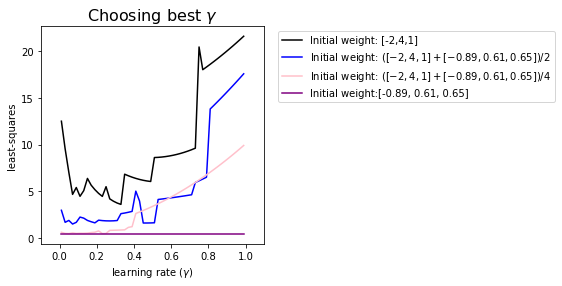

In [92]:
# best gamma?
w0 = np.array([-2, 4, 1])

g = np.linspace(0.01,0.99, 50)

squares = np.zeros([50,3])

for i in range(50):
    squares[i,0]= least_squares(w_fit3(w0, tilde_C[:,0:3], tilde_C[:,3], g[i] , 10))
    squares[i,1] = least_squares(w_fit3(1/2*(best_w.x+w0), tilde_C[:,0:3], tilde_C[:,3], g[i] , 10))
    squares[i,2] = least_squares(w_fit3(1/4*(best_w.x+w0), tilde_C[:,0:3], tilde_C[:,3], g[i] , 10))
    
fig = plt.figure(figsize=(4,4))

plt.plot(g, squares[:,0], '-k', label = 'Initial weight: [-2,4,1]')
plt.plot(g, squares[:,1], '-b', label = 'Initial weight: $([-2,4,1] + [-0.89, 0.61, 0.65])/2$')
plt.plot(g, squares[:,2], 'pink', label = 'Initial weight: $([-2,4,1] + [-0.89, 0.61, 0.65])/4$') 
plt.plot(g, least_squares(best_w.x)*np.ones([50,1]), 'purple', label = 'Initial weight:[-0.89, 0.61, 0.65]') 
axes = plt.gca()
axes.set_xlim([-0.1,1.1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
axes.set_xlabel('learning rate ($\gamma$)')
axes.set_ylabel('least-squares')
plt.title('Choosing best $\gamma$', fontsize = 16)

# Problem 2

In [57]:
# Import data
# https://realpython.com/python-csv/
credit_data = np.loadtxt(open("credit_data.csv", "rb"), delimiter=",", skiprows=1)
credit_label = np.loadtxt(open("credit_label.csv", "rb"), delimiter=",", skiprows=1)

training_data = np.hstack((np.ones((500,1)),credit_data[0:500, :]))
training_label = np.vstack(credit_label[0:500])

test_data = np.hstack((np.ones((153,1)),credit_data[500:653, :]))
test_label = np.vstack(credit_label[500:653])

# Initialize
learning_rate = 0.1
EPOCH = 1000

In [69]:
# A
# unchanged data

np.random.seed(0)

# starting weight random vs. Nelder-Mead?
#w0 = np.random.rand(16) #initial weight guess
w0 = [np.random.uniform(-1, 1) for p in range(0, 16)]
#print(w0)

# Nelder-Mead to find good starting weight
# https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
def loss(w):
    return (1/500)* np.sum(np.square(np.subtract(w @ training_data.T, training_label)))

nmw = minimize(loss, w0, method='nelder-mead',
               options={'disp': False})
print('nelder-mead start= ', np.around(nmw.x, decimals = 2))


#Perceptron Algorithm (comparing random and Nelder-Mead)
#w1 = w_fit3(w0, training_data, training_label, learning_rate,EPOCH)
w2 = w_fit3(nmw.x, training_data, training_label, learning_rate,EPOCH)
print(np.around(w2, decimals = 2))


#how'd it do with it's own points?
self_error = np.count_nonzero((np.transpose([np.sign(w2 @ np.transpose(training_data))])-training_label))/500
print(self_error)


#how'd it do with the unseen points?
unseen_error = np.count_nonzero((np.transpose([np.sign(w2 @ np.transpose(test_data))])-test_label))/153
meh = sum(1 for x in (np.transpose([np.sign(w2 @ np.transpose(test_data))])-test_label) if x > 0)
nrh = sum(1 for x in (np.transpose([np.sign(w2 @ np.transpose(test_data))])-test_label) if x < 0)
print(unseen_error, meh, nrh)


nelder-mead start=  [ 0.16 -0.31 -0.18  0.5  -0.28  0.54  0.08  0.5  -0.03 -0.03  0.13  0.11
  0.16  2.15 -0.   -0.  ]
[  -572.64  -2586.11  -1169.49    884.84  -3397.08  -3396.26   -867.32
 -12119.3   12800.61 -12447.83  -3450.87   8655.11  -2122.24   2195.75
  -1324.4   10229.6 ]
0.352
0.3202614379084967 31 18


In [70]:
# B
# normalize data
#norm = np.amax(credit_data,axis=0)
norm = np.amax(training_data[0:500,1:16],axis=0)

norm_training = np.zeros((500,16))
norm_test = np.zeros((153,16))
for j in range(1,16):
    for i in range(500):
        norm_training[i,0] = 1
        norm_training[i,j] = training_data[i,j]/norm[j-1]
    for k in range(153):
        norm_test[k,0] = 1
        norm_test[k,j] = test_data[k,j]/norm[j-1]

# Nelder-Mead
def norm_loss(w):
    return (1/500)* np.sum(np.square(np.subtract(w @ norm_training.T, training_label)))

norm_nmw = minimize(norm_loss, w0, method='nelder-mead',
               options={'disp': False})
print('normed Nelder-Mead = ', np.around(norm_nmw.x,decimals = 2))


#Perceptron Algorithm: gives best weight
#w1n = w_fit3(w0, norm_training, training_label, learning_rate,EPOCH)
w2n = w_fit3(norm_nmw.x, norm_training, training_label, learning_rate,EPOCH)
print(np.around(w2n, decimals = 2))

# on itself
norm_self_error = np.count_nonzero((np.transpose([np.sign(w2n @ np.transpose(norm_training))])-training_label))/500
print(norm_self_error)

# on unseen data        
norm_unseen_error = np.count_nonzero((np.transpose([np.sign(w2n @ np.transpose(norm_test))])-test_label))/153
meh = sum(1 for x in (np.transpose([np.sign(w2n @ np.transpose(norm_test))])-test_label) if x > 0)
nrh = sum(1 for x in (np.transpose([np.sign(w2n @ np.transpose(norm_test))])-test_label) if x < 0)
print(norm_unseen_error, meh, nrh)

normed Nelder-Mead =  [ 0.51 -0.13  0.17 -0.23 -0.52  0.44 -0.25  0.13 -0.32 -0.17 -0.19 -0.17
  0.   -0.04 -0.02 -0.51]
[ 2.710e+00 -4.300e-01 -5.500e-01 -1.070e+00  1.000e-02  9.700e-01
 -2.900e-01  5.500e-01  1.920e+00 -2.370e+00 -1.290e+00 -3.300e-01
 -5.000e-01 -1.100e-01 -1.180e+00  1.366e+01]
0.236
0.1830065359477124 4 24
